In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import os
import random

In [10]:
#Wywalam połowę, żeby nie było za dużo danych na grafie i dało się to jakoś przeczytać

G = nx.read_gml("./lesmiserables.gml")
nodes = list(G.nodes())
nodes_to_remove = random.sample(nodes, len(nodes) // 2)
G.remove_nodes_from(nodes_to_remove)

In [11]:
node_size = [G.degree(node) * 10 for node in G]

def shared_neighbors(G, u, v):
    return len(set(G.neighbors(u)).intersection(G.neighbors(v)))

shared_neighbors_list = [shared_neighbors(G, u, v) for u, v in G.edges()]
max_shared = max(shared_neighbors_list)
min_shared = min(shared_neighbors_list)
edge_color = [(n - min_shared) / (max_shared - min_shared) for n in shared_neighbors_list]

cmap = plt.cm.viridis

C:\Users\adamk\AppData\Local\Temp\ipykernel_4960\1153751387.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, label='Kolory krawędzi', shrink=0.5)


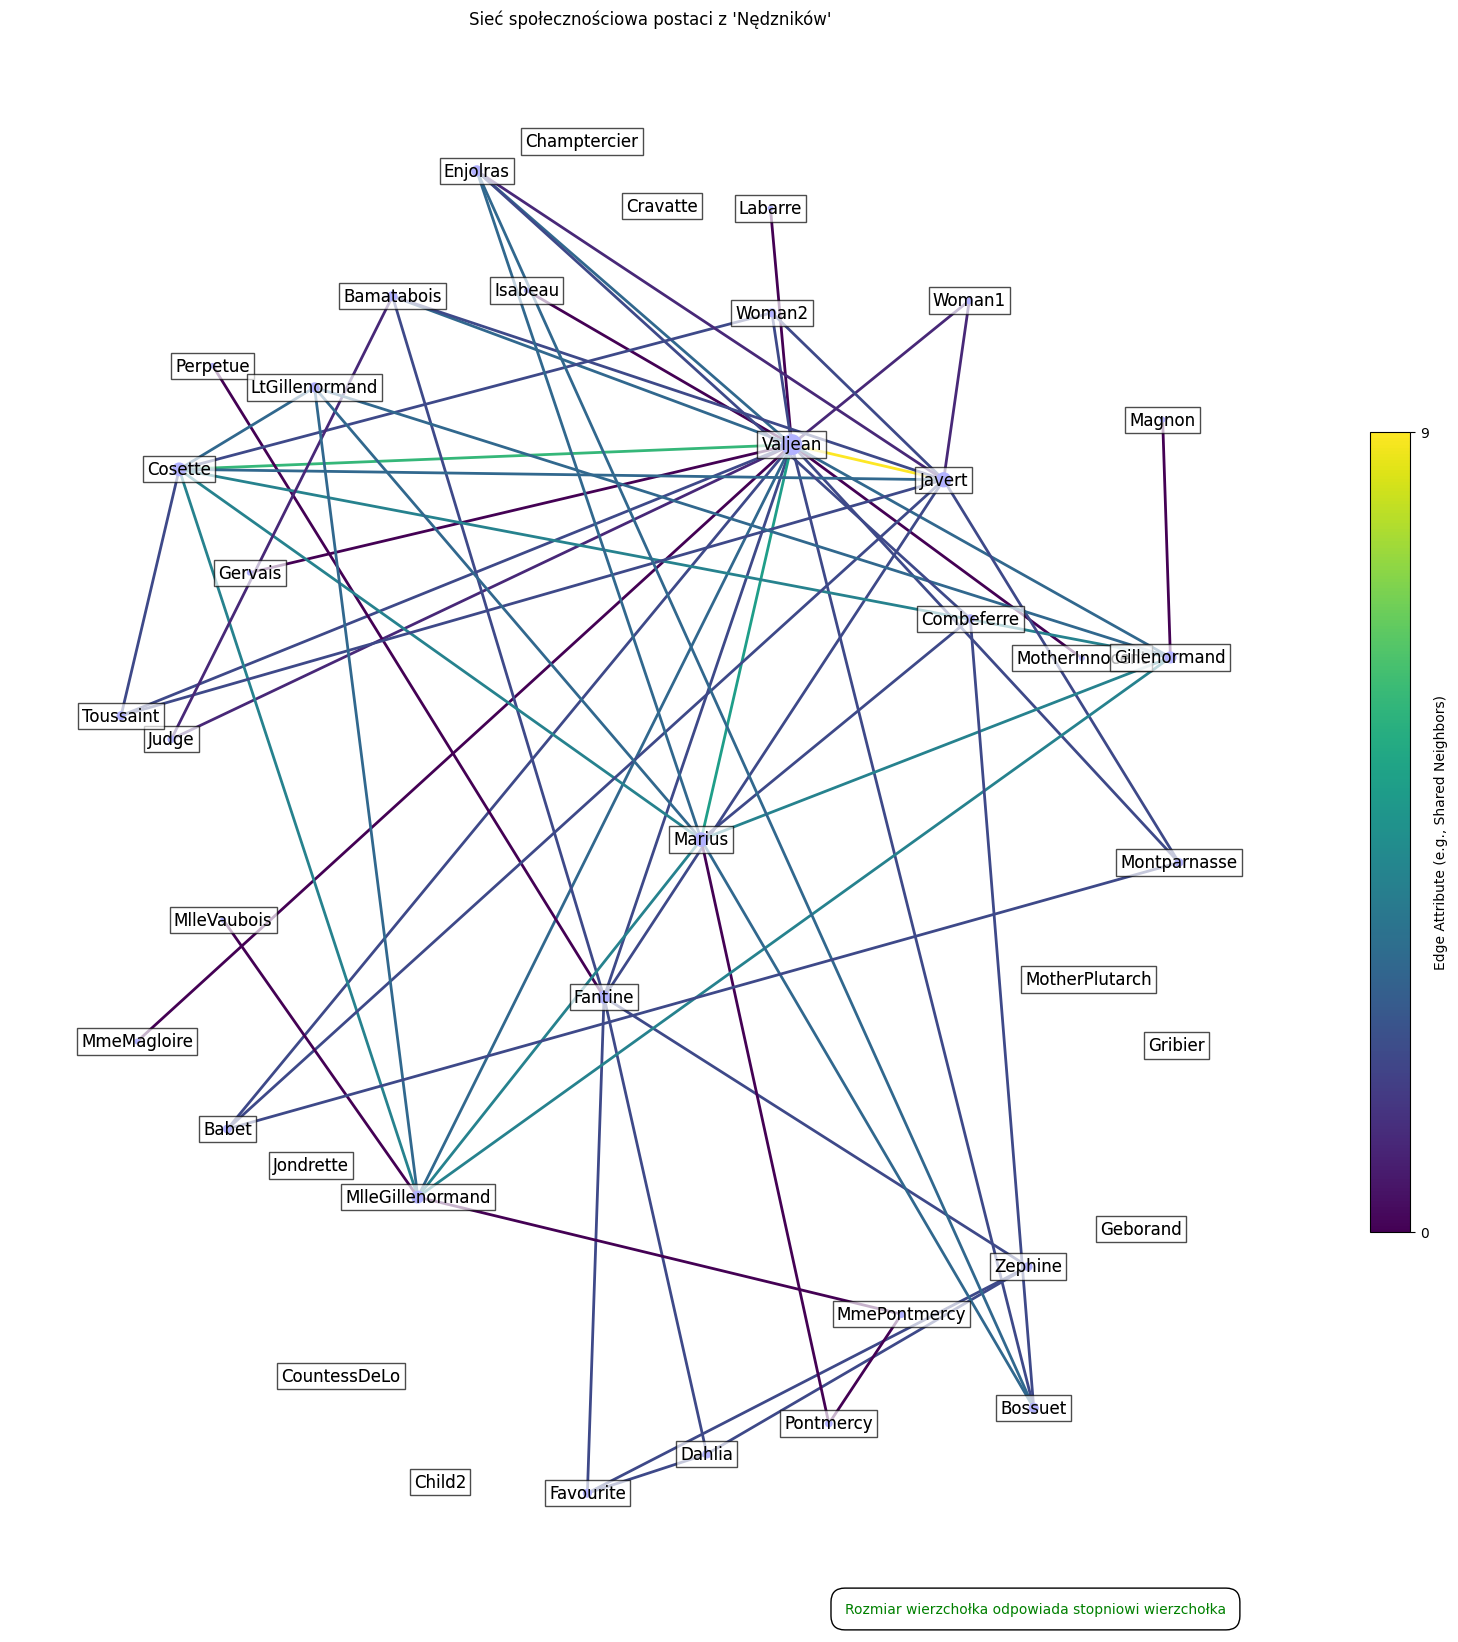

In [12]:
plt.figure(figsize=(16, 16))
pos = nx.spring_layout(G, k=1, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=node_size, width=2,
        font_size=12, node_color='blue', edge_color=edge_color, edge_cmap=cmap)
plt.title("Sieć społecznościowa postaci z 'Nędzników'")
label_options = {'ec': 'k', 'fc': 'white', 'alpha': 0.7, 'pad': 3}
nx.draw_networkx_labels(G, pos, font_size=12, bbox=label_options)

plt.text(0.95, 0.01, 'Rozmiar wierzchołka odpowiada stopniowi wierzchołka',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes,
         color='green', fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
sm.set_array([])
cb = plt.colorbar(sm, label='Kolory krawędzi', shrink=0.5)
cb.set_label('Ilość wspólnych sąsiadów obu wierzchołków połączonych krawędzią')

cb.set_ticks([min(edge_color), max(edge_color)])
cb.set_ticklabels([f'{min_shared}', f'{max_shared}'])
plt.savefig('./graph_visualization.png', format='png', dpi=300)
plt.show()